# Dataset on population and income by country over years

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I analyze a dataset and then communicate my findings about it.  
I use the Python libraries NumPy, pandas, and Matplotlib.The data was downloaded from [Gapminder](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000) on 19/06/2021.  
Here, I will be using 3 datasets for answering to the posed questions.


### Questions  
1.  Which are the countries with lower density of population and higher income per person over time?
2.  Is there correlation between density of population and income per person?  
3.  How much population of the plantet increased since 1950?


### List of datasets:
1. Income per person (GDP/capita, PPP$ inflation-adjusted).  
Description: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).  
2. Population, total.  
Description: Total population.  
3. Population density (per square km).  
Description: Average number of people on each square km of the land in the given country.


In [31]:
#import Python libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skewnorm
%matplotlib inline
#make large numbers more readable
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
### Data wrangling

Here we will be adjusting and cleaning the data for further explatoratoty analysis

#### General properties

In [32]:
#download data on total population
pop = pd.read_csv('Data Analyst_project 1\\population_total.csv')
#print sample 5 row of the dataset
pop.sample(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
180,Tuvalu,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,19.8k,19.8k,19.8k,19.9k,19.9k,19.9k,20k,20k,20k,20k
47,Denmark,1M,1.01M,1.01M,1.02M,1.03M,1.04M,1.04M,1.05M,1.06M,...,6.76M,6.77M,6.78M,6.79M,6.81M,6.82M,6.83M,6.85M,6.86M,6.87M
148,Romania,5.5M,5.54M,5.58M,5.63M,5.67M,5.71M,5.75M,5.8M,5.84M,...,12.5M,12.4M,12.3M,12.3M,12.2M,12.1M,12.1M,12M,11.9M,11.9M
146,Palestine,166k,166k,166k,166k,166k,166k,166k,166k,166k,...,12M,12.1M,12.1M,12.1M,12.2M,12.2M,12.2M,12.2M,12.3M,12.3M
161,South Sudan,1.03M,1.03M,1.03M,1.03M,1.03M,1.03M,1.04M,1.04M,1.04M,...,30.5M,30.6M,30.8M,30.9M,31.1M,31.2M,31.4M,31.5M,31.6M,31.7M


In [33]:
#download data on density of population
den = pd.read_csv('Data Analyst_project 1\\population_density_per_square_km.csv')
#print sample 5 row of the dataset
den.sample(5)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
95,India,127,129,131,133,135,138,140,143,146,...,508,505,503,501,498,496,494,491,489,487
233,Zimbabwe,7.1,7.32,7.55,7.8,8.05,8.31,8.58,8.85,9.14,...,79.7,79.7,79.8,79.9,79.9,80,80,80,80,80
165,Palau,16.2,16.3,16.6,17,17.5,18.1,18.7,19.3,20,...,32.3,32.2,32,31.9,31.8,31.6,31.4,31.3,31.1,31
22,Bosnia and Herzegovina,52.2,53.2,54.2,55.3,56.4,57.6,58.7,59.8,60.9,...,35.1,34.8,34.4,34.1,33.7,33.4,33.1,32.8,32.5,32.2
226,Vietnam,80,81.8,83.8,85.9,88.3,90.8,93.4,96.2,99.2,...,324,323,322,321,320,319,317,316,315,314


In [34]:
#download data on income per person
inc = pd.read_csv('Data Analyst_project 1\\income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
#print sample 5 row of the dataset
inc.sample(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
74,Croatia,1080,1090,1100,1110,1120,1130,1140,1150,1160,...,33.7k,34.4k,35.1k,35.8k,36.6k,37.3k,38.1k,38.8k,39.6k,40.4k
108,Moldova,621,621,621,621,621,621,622,622,622,...,10000,10.2k,10.4k,10.6k,10.9k,11.1k,11.3k,11.5k,11.8k,12k
20,Belarus,608,608,608,609,609,609,610,610,610,...,19.9k,20.3k,20.7k,21.1k,21.5k,22k,22.4k,22.9k,23.3k,23.8k
69,Grenada,959,959,959,959,959,959,959,960,960,...,18.9k,19.3k,19.7k,20.1k,20.5k,21k,21.4k,21.8k,22.3k,22.7k
90,Kyrgyz Republic,508,508,508,508,508,508,509,509,509,...,4240,4320,4410,4500,4590,4680,4780,4870,4970,5070


#### Data Cleaning

First we need to reshape the datasets each variable make a column

In [35]:
#creation of two non-identifier columns: 'country' and 'year' leaving population into one column
pop = pop.melt(id_vars = ['country'], var_name = ['year'], value_name = 'population')
#display the reshaped table
pop.head()

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [36]:
#creation of two non-identifier columns: 'country' and 'year' leaving population density into one column, change all NaN values with 0
den = den.melt(id_vars = ['country'], var_name = ['year'], value_name = 'density').fillna(0)
#display the reshaped table
den.head()

,country,year,density
0,Aruba,1950,211
1,Afghanistan,1950,11.9
2,Angola,1950,3.65
3,Anguilla,1950,56.9
4,Albania,1950,46.1


In [37]:
#creation of two non-identifier columns: 'country' and 'year' leaving income into one column
inc = inc.melt(id_vars = ['country'], var_name = ['year'], value_name = 'income')
#check by displaying the result 
inc.head()

,country,year,income
0,Afghanistan,1800,603
1,Angola,1800,618
2,Albania,1800,667
3,Andorra,1800,1200
4,United Arab Emirates,1800,998


After the individual datasets were reshaped, I merge them to have ability to analyse them from one dataset. I decided to use inner join, because I want to see the how the variables interact with one another.

In [38]:
#join the tables into one dataset.
merged = pd.merge(pop, den, how = 'inner', left_on = ['country', 'year'], right_on = ['country', 'year'])
dataset = pd.merge(merged, inc, how = 'inner', left_on = ['country', 'year'], right_on = ['country', 'year'])

In [39]:
#display sample of five rows of the dataset
dataset.sample(5)

,country,year,population,density,income
6886,United Kingdom,1985,56.4M,233,22.9k
15056,Cuba,2027,11.2M,105,10.1k
15342,New Zealand,2028,5.11M,19.4,39.8k
17741,Yemen,2040,42.7M,80.8,3870
13390,Nepal,2018,28.1M,196,2720


I noted that *population, density and income* columns contain values that cannot be changed to int.
These values are located as the last symbol of an indicator. We need to deal with them.

In [40]:

#create list of unique last symbols of the indicator in each row
last_pop = dataset['population'].str.strip().str[-1]
last_pop.unique()

array(['M', '0', 'k', 'B'], dtype=object)

In [41]:
#create list of unique last symbols of the indicator in each row
last_den = dataset['density'].str.strip().str[-1]
last_den.unique()

array(['9', '5', '1', '2', '3', '6', '4', '0', '7', '8', 'k'],
      dtype=object)

In [42]:
#create list of unique last symbols of the indicator in each row
last_inc = dataset['income'].str.strip().str[-1]
last_inc.unique()

array(['0', 'k', '6', '7', '8', '9', '2', '4', '5', '3', '1'],
      dtype=object)

In [43]:
#replace symbols k, M, B  and change type of columns 'population', 'density', 'income' to integers
#I added for loop to the code taken from stackoverflow.com from user "cs95"
columns = ['population', 'density', 'income']
for column in columns:
    dataset[column] = dataset[column].replace({'k': '*1e3', 'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(int)

In [44]:
#check the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17745 entries, 0 to 17744
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     17745 non-null  object
 1   year        17745 non-null  object
 2   population  17745 non-null  int32 
 3   density     17745 non-null  int32 
 4   income      17745 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 623.8+ KB


In [45]:
#display first five rows
dataset.head()

,country,year,population,density,income
0,Afghanistan,1950,7750000,11,2390
1,Angola,1950,4550000,3,3180
2,Albania,1950,1260000,46,1780
3,Andorra,1950,6200,13,6980
4,United Arab Emirates,1950,69600,0,1210


In [46]:
#display last five rows
dataset.tail()

,country,year,population,density,income
17740,Samoa,2040,244000,86,9150
17741,Yemen,2040,42700000,80,3870
17742,South Africa,2040,71400000,58,15600
17743,Zambia,2040,31300000,42,4180
17744,Zimbabwe,2040,20900000,53,3140


The dataset contains data from 1950 till 2040. It is assumed that from 2011 till 2040 all value are estimated and these estimations are reliable.

In [47]:
#check if there is any NaN values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17745 entries, 0 to 17744
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     17745 non-null  object
 1   year        17745 non-null  object
 2   population  17745 non-null  int32 
 3   density     17745 non-null  int32 
 4   income      17745 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 623.8+ KB


In [48]:
#Check if there are any duplicates
sum(dataset.duplicated())


0

Now data is clean and ready for exploratory analysis

<a id='eda'></a>
## Exploratory data analysis

### Which are the countries with lower density of population and higher income per person over time?

To approach this question I decided to take average income and average density by country over the years.
Then I took 90% quantile of average income by country and average population density by country to display  
__top__ countries with lower population density and higher income.

In [49]:
#create new dataframe with average income and average density grouped by country
inc_den = dataset.groupby(['country']).agg({'income': 'mean', 'density' : 'mean'}).reset_index()

In [50]:
#find 90% quantile of income column
inc_qtl = inc_den['income'].quantile(0.9)
#find 90% quantile of density column
den_qtl = inc_den['density'].quantile(0.9)


In [51]:
#filter dataframe inc_den by income 90% quantinle and density 90% quantile
que1 = inc_den.query('income > {} & density < {}'.format(inc_qtl, den_qtl))
#display the results
que1

,country,income,density
3,Andorra,39323.74,112.45
24,Brunei,88704.40,53.58
46,Denmark,36696.70,124.92
64,Germany,34596.15,227.78
81,Ireland,40147.14,56.48
90,Kuwait,63131.85,130.20
99,Luxembourg,63101.10,179.26
128,Norway,50149.43,12.12
140,Qatar,103661.21,108.18
147,Saudi Arabia,43062.64,8.90


In [52]:
#Set up styles for the graphs globally
sb.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=1)  

Further, I wanted to plot income by country and density of poputlation by country. To do that, I will use bar plots with average quantitative variables on the x axis and nominal categorical variable on y axis. Since I am dealing with nominal categorical variables, I want them to be plotted in order of values of quantitative variables.

In [152]:
#Set up orders for next two plots
order_income = que1.sort_values('income', axis = 0, ascending = False)
order_income = list(order_income['country'])
order_density = que1.sort_values('density', axis = 0, ascending = False)
order_density = list(order_density['country'])

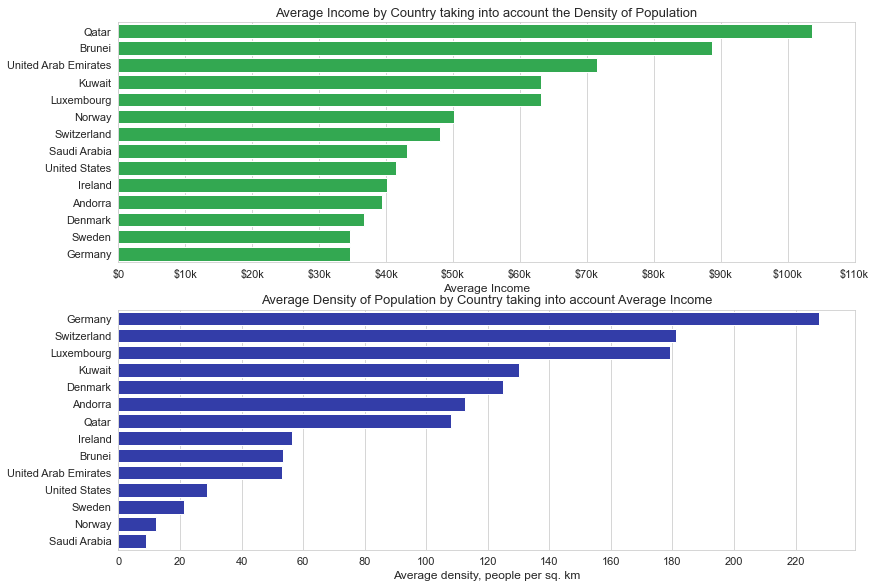

In [153]:
#display two plots: one for income by countries and the other for density by countries
plt.figure(figsize=(12,8), tight_layout=True)
plt.subplot(2,1,1)
sb.barplot(data = que1, x = 'income', y = 'country', order = order_income, color = '#1FBC47')
plt.title('Average Income by Country taking into account the Density of Population')
ticks = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
labels = ['$0', '$10k', '$20k', '$30k', '$40k', '$50k', '$60k', '$70k', '$80k', '$90k', '$100k', '$110k']
plt.ylabel('')
plt.xlabel('Average Income')
plt.xticks(ticks, labels);
plt.subplot(2,1,2)
sb.barplot(data = que1, x = 'density', y = 'country', order = order_density, color = '#1F2DBC')
plt.title('Average Density of Population by Country taking into account Average Income')
ticks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
plt.ylabel('')
plt.xlabel('Average density, people per sq. km')
plt.xticks(ticks, labels);

People from Qatar earn the most from the countries with lower density of population, followed by Brunei and United Arab Emirates

Saudi Arabia has the lowest density of population among countries with higher income per person, followed by Norway and Sweden

### Is there a correlation between density of population and income per person? 

Let's take a look at distribution of individual variables first and then create a scatter plot to see if there is a correlation between density of population and income per person

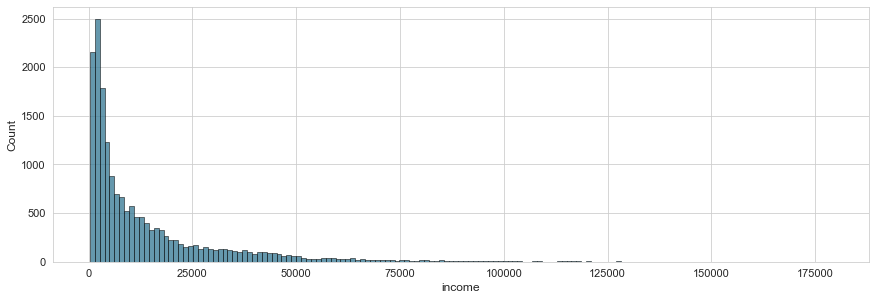

In [177]:
# start with a standard-scaled plot
plt.figure(figsize=(12,4), tight_layout=True)
sb.histplot(data = dataset, x ='income', color = '#327692', edgecolor = 'black',
                 linewidth = 0.5);


There's a long tail in the distribution, so let's put it on a log scale instead

In [178]:
#Statistics for log10 Income column
np.log10(dataset.income).describe()

count   17745.00
mean        3.84
std         0.54
min         2.49
25%         3.41
50%         3.83
75%         4.26
max         5.25
Name: income, dtype: float64

In [179]:
#Create bins for the histplot
bins = 10 ** np.arange(2.49, 5.25+0.05, 0.025)

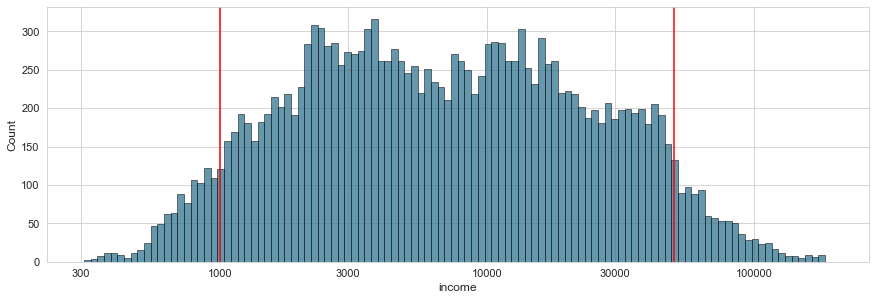

In [180]:
#Display a distribution on a log scale
plt.figure(figsize=(12,4), tight_layout=True)
sb.histplot(data = dataset, x ='income', bins = bins, color = '#327692', edgecolor = 'black',
                 linewidth = 0.5)
ticks = [300, 1000, 3000, 10000, 30000, 100000]
labels = [300, 1000, 3000, 10000, 30000, 100000]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.axvline(1000, color = 'r');
plt.axvline(50000, color = 'r');

Visually, we can note that most of the data on income falls within range from 1000 to 50000. I highlighted edges with vertical red line.

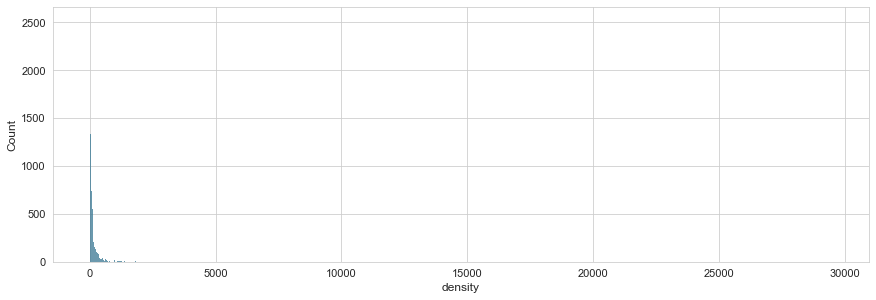

In [184]:
# Plot a distribution of density of population.
plt.figure(figsize=(12,4), tight_layout=True)
sb.histplot(data = dataset, x ='density', color = '#327692');


Here, I see a long tail as well and I will put the x axis on a log scale in order to make the distribution visible

In [185]:
#Display Statistics for bins
np.log10(dataset.density).describe()

C:\Users\averi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count   17745.00
mean        -inf
std          NaN
min         -inf
25%         1.28
50%         1.81
75%         2.15
max         4.47
Name: density, dtype: float64

In [186]:
#Store bins in a variable
bins_den =10 ** np.arange(1, 4.47+0.03, 0.03)

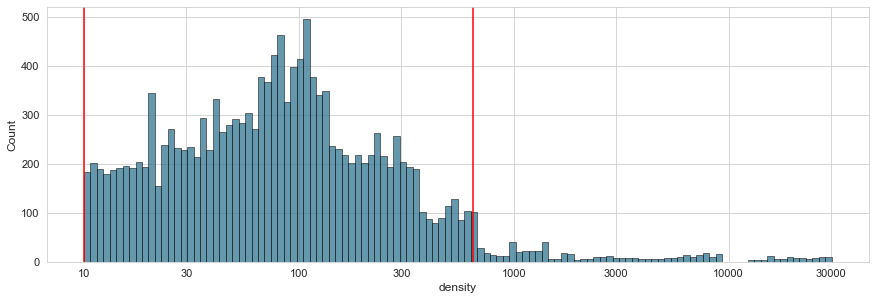

In [187]:
#Display a hist plot with log scale on x axis
plt.figure(figsize=(12,4), tight_layout=True)
sb.histplot(data = dataset, x ='density', bins = bins_den, color = '#327692', edgecolor = 'black',
                 linewidth = 0.5)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.axvline(10, color = 'r')
plt.axvline(650, color = 'r');

From the hist above we can see that population density falls within range from 10 to 650. I highlighted edges with vertical red line.

Despite income data ranges from 0 to 175000 and density data ranges from 0 to 30000, most of the data falls within range from 0 to 50000 and from 0 to 650 respectively. Let's include only those ranges into line plot.

In [188]:
#Create filtered dataframe
density = dataset.query('density <= 650 & income <= 50000' )
density.density.describe()

count   16297.00
mean       98.82
std       118.94
min         0.00
25%        18.00
50%        58.00
75%       123.00
max       650.00
Name: density, dtype: float64

In [189]:
#Create positioning on x axis
xbin_edges = np.arange(0, 650 + 10, 10)
xbin_centers = xbin_edges[:-1] +5
den_binned = pd.cut(density['density'], xbin_edges, include_lowest = True)

In [190]:
#Create positioning on y axis
income_mean = density['income'].groupby(den_binned).mean()

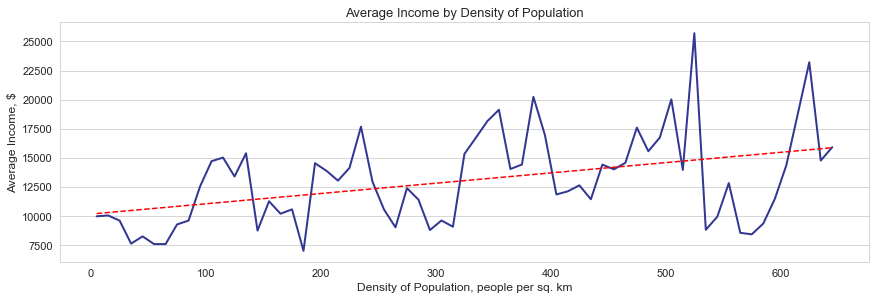

In [191]:
#Create a lineplot to depict interaction between income and density
plt.figure(figsize=(12,4), tight_layout=True)
sb.lineplot(x = xbin_centers, y = income_mean, lw = 2, color = '#323792')
plt.title('Average Income by Density of Population')
plt.xlabel('Density of Population, people per sq. km')
plt.ylabel('Average Income, $')
plt.grid(axis='x')
#Create a line of best fit
z = np.polyfit(xbin_centers, income_mean, 1)
p = np.poly1d(z)
plt.plot(xbin_centers,p(xbin_centers),"r--");

This scatter plot shows us upward trend, which means that there may be a correlation between density of population and income

In [195]:
#display correlation coefficient
r = np.corrcoef(xbin_centers, income_mean)
r[0,1]

0.423670426980471

The correlation coefficient is 42% which can be considered as a moderate correlation.

###  By how much population of the plantet  has increased since 1950?

In [193]:
#create dataframe for total population over time
pop_incr = dataset.groupby(['year'])['population'].sum().reset_index()
#display main characteristics of pop_incr dataframe
pop_incr.describe()

,population
count,91.00
mean,5750929232.44
std,2070694675.16
min,2531899140.00
25%,3883796969.00
50%,5735213400.00
75%,7581256846.50
max,9188958599.00


The summary statistics displays main features of pop_incr dataframe, with minimum total population of 2bln and maximum population in a particular year of 9bln.

In [175]:
#Create a list to be included in text on the line plot
s = pop_incr[pop_incr['year'].isin(xlabels)]
s_list = list(s.population)

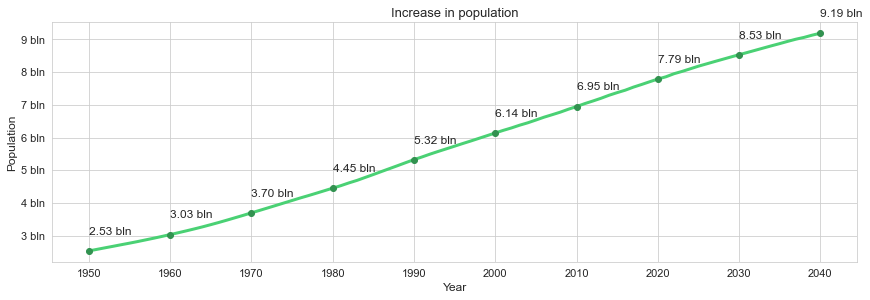

In [176]:
#create line chart to displaty increase in population over time
plt.figure(figsize=(12,4), tight_layout=True)
sb.lineplot(data = pop_incr, x = 'year', y = 'population', lw = 3, color = '#4AD174')
xticks = [0,10,20,30,40,50,60,70,80,90]
xlabels = ['1950','1960','1970','1980','1990','2000','2010','2020','2030','2040']
yticks = [0*1e9, 1*1e9, 2*1e9, 3*1e9, 4*1e9, 5*1e9, 6*1e9, 7*1e9, 8*1e9, 9*1e9]
ylabels = [0, '1 bln', '2 bln', '3 bln', '4 bln', '5 bln', '6 bln', '7 bln', '8 bln', '9 bln']
plt.title('Increase in population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
for i , y in zip(xticks, s_list):
    plt.text(i, y+1e9/2,'{:0.2f} bln'.format(y/1e9), fontsize=12)
    plt.plot(i, y, 'o', color = '#329250');
#plt.grid(axis='x');

The graph above clearly ilustrates that from 1950 to 2040 population increases, which supports the summary statistics provided earlier in this section.

<a id='conclusions'></a>
## Conclusions

In conclusion, we found out which contries have the highest income per person on average and the lowest population density on average. However, the data covers periods from 1950 till 2040, and average value may be not representative. For example, the countries where income is high and density in low only in recent years may be missed in the report.  
I expected to see correlation between density of population and level of income, because I assume that people will move to the places with higher income, and therefore there will be higher density of population. However, the explorations showed correlation coefficient between income and density is equal to 0.42, which can be considered as a moderate relationship. The trendline on the scatterplot support this. It seems that density of population is affected by more factors, not just level of income in a particular place.  
As expected population of our planet grows. The descriptive statistics says that from 1950 it increased from 2 billions to 9 billions. The line graph in the report clearly demonstrates the phenomena.

### Limitations and assumptions

1. For research question number 2 the data provided may be enhanced by including other factors. For example, difficulties to move to the country with higher income.  
2. The dataset includes data till 2040, projected data increase uncertainty, therefore the projected data may be unreliable
3. Overall, raw data is well structured with minimum of lines to be droped, which inreases reliability
4. In research question number 2, it is not difficult to decide on existing correlations between variables just by looking at scatter plots, however a statistical hypothesis testing is needed.

### List of resources

1. stackoverflow.com
2. pandas.pydata.org
3. towardsdatascience.com